# Overview

This week we'll get started on modern network science. We'll focus on two key results that kick-started a revolution in our understanding of networks.

* Problems with random networks as models for real networks and the Watts-Strogatz model
* Scale-free networks and the Barabasi-Albert model

Everything is divided up into 3 big chuncks. We're now up to speed, so there's a substantial amount of material today ... but I also hope that it's fun and feels worth your time :)


# Part 1: Small world networks

Once again, we'll start with some lecturing. So it's time to watch a little video to get you started.

> **_Video Lecture_**: Some properties of real world networks. Clustering and small paths. The Watts-Strogatz model. 
> 

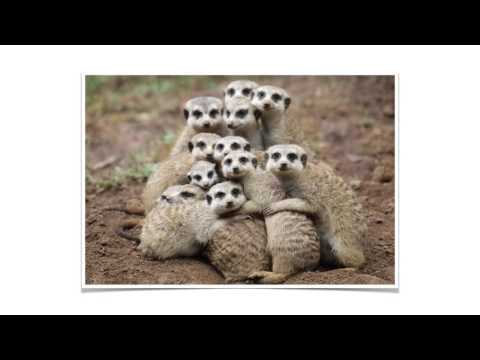

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("tMLJ2NYI1FU",width=800, height=450)

Next up is fun with reading the textbook. There's lots of goodies left in Chapter 3 that covers the stuff I've just covered in the video from a slightly different angle. 
> 
> *Reading*: For this part, we'll read the remaining part of *Network Science* Chapter 3, Section 3.5 - 3.10, with ***emphasis*** on 3.8 and 3.9\.
> 


> *Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook. 
> 
> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.
> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?


<div class="alert alert-block alert-info">
For all of the reading questions I recommend not using a LLM. The questions are designed to make sure you actually read and understand the textbook. If you don't do it yourself, it won't stick in your human brain!
</div>

> **Answer**

> **What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?**

Taken together, in a random society all individuals are expected to have a comparable number of friends. Hence if people are randomly connected to each other, we lack outliers: There are no highly popular individuals, and no one is left behind, having only a few friends. This suprising conclusion is a consequence of an important property of random networks: in a large random network the degree of most nodes is in the narrow vicinity of ‹k›

> **List the four regimes that characterize random networks as a function of $\langle k \rangle$.**

<img src="SymPyBilleder/2025-09-17-11-31-15.png" width="450">

**Subcritical Regime: $0 \, ‹ \, ‹k› \, ‹ \,1$ ($p \, < \, 1/N$ , Image 3.7b).**\
The subcritical regime the network consists of numerous tiny components, whose size follows the exponential distribution (3.35). Hence these components have comparable sizes, lacking a clear winner that we could designate as a giant component.

**Critical Point: $‹k› = 1$ ($p = 1/N$ , Image 3.7c).**\
The critical point most nodes are located in numerous small components, whose size distribution follows (3.36). The power law form indicates that components of rather different sizes coexist. These numerous small components are mainly trees, while the giant component may contain loops. Note that many properties of the network at the critical point resemble the properties of a physical system undergoing a phase transition.

**Supercritical Regime: $‹k› \, › 1$ ($p \, ›\, 1/N$ , Image 3.7d).**\
The supercritical regime numerous isolated components coexist with the giant component, their size distribution following (3.35). These small components are trees, while the giant component contains loops and cycles. The supercritical regime lasts until all nodes are absorbed by the giant component.

**Connected Regime: $‹k› \, › \, lnN$ ($p \, › \, lnN/N$, Image 3.7e).**\
The random network model predicts that the emergence of a network is not a smooth, gradual process: The isolated nodes and tiny components observed for small ‹k› collapse into a giant component through a phase transition (ADVANCED TOPICS 3.F). As we vary ‹k› we encounter four topologically distinct regimes (Image 3.7).

> **According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?**

To test the validity of (3.21) we plot ‹C›/‹k› in function of N for several undirected networks (Image 3.13a). 

<img src="SymPyBilleder/2025-09-17-11-49-05.png" width="450">Image 3.13

We find that ‹C›/‹k› does not decrease as N-1, but it is largely independent of N, in violation of the prediction (3.21) and point (1) above. In Image 3.13b-d we also show the dependency of C on the node’s degree ki for three real networks, finding that C(k) systematically decreases with the degree, again in violation of (3.21) and point (2).

Degree Distribution\
A random network has a binomial distribution, well approximated by a Poisson distribution in the k « N limit. Yet, as shown in Image 3.5, the Poisson distribution fails to capture the degree distribution of real networks. In real systems we have more highly connected nodes than the random network model could account for.

The next set of exercises departs from the book by presenting a little study of the Watts-Strogatz (WS) model. We're going to see just how few random links the WS model needs to dramatically shorten the path-lengths in the network. And while doing that, we'll practice using `networkx`, writing loops, and plotting nice figures.

> *Exercises*: WS edition.
> 
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one. 
> * Describe what happens to the network when $p = 1$.
> * Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.
> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).
> * Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

<div class="alert alert-block alert-info">
Again, I hope you will try solving the coding part of this on your own - especially the part that draws on NetworkX. The whole idea is to connect concepts from the literature to real-world code. And that learning happens when you try it on your own. I also recommend you do the loops on your own. It's OK to use LLMs to style the plot. 
</div>

![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ws.png)

> **Answer**

> **First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one.**

In [2]:
import networkx as nx

WS1 = nx.watts_strogatz_graph(500, 4, 0)
WS2 = nx.watts_strogatz_graph(500, 4, 0.1)
WS3 = nx.watts_strogatz_graph(500, 4, 1)

To calculate the average shortest path length $\langle d \rangle$ for each one, we use `nx.average_shortest_path_length`. 

In [3]:
nx.average_shortest_path_length(WS1), nx.average_shortest_path_length(WS2), nx.average_shortest_path_length(WS3)

(62.875751503006015, 7.551358717434869, 4.773547094188377)

> **Describe what happens to the network when $p = 1$.**

For $p = 1$ we have $‹k›= N-1$, hence the network is a complete graph and all nodes belong to a single component.
This is a fully randomized network. 

<img src="SymPyBilleder/2025-09-17-12-31-13.png" width="450">

> **Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.**

In [4]:
WS1 = nx.watts_strogatz_graph(500, 4, 0)
WS2 = nx.watts_strogatz_graph(500, 4, 0.1)
WS3 = nx.watts_strogatz_graph(500, 4, 0.2)
WS4 = nx.watts_strogatz_graph(500, 4, 0.3)
WS5 = nx.watts_strogatz_graph(500, 4, 0.4)
WS6 = nx.watts_strogatz_graph(500, 4, 0.5)
WS7 = nx.watts_strogatz_graph(500, 4, 0.6)
WS8 = nx.watts_strogatz_graph(500, 4, 0.7)
WS9 = nx.watts_strogatz_graph(500, 4, 0.8)
WS10 = nx.watts_strogatz_graph(500, 4, 0.9)
WS11 = nx.watts_strogatz_graph(500, 4, 1)

nx.average_shortest_path_length(WS1), nx.average_shortest_path_length(WS2), nx.average_shortest_path_length(WS3), nx.average_shortest_path_length(WS4), nx.average_shortest_path_length(WS5), nx.average_shortest_path_length(WS6), nx.average_shortest_path_length(WS7), nx.average_shortest_path_length(WS8), nx.average_shortest_path_length(WS9), nx.average_shortest_path_length(WS10), nx.average_shortest_path_length(WS11)

(62.875751503006015,
 7.614380761523046,
 6.004480961923847,
 5.412913827655311,
 5.222028056112224,
 4.971743486973948,
 4.8642244488977955,
 4.793218436873747,
 4.812761523046092,
 4.754364729458918,
 4.7432224448897795)

If we look at the values, it is hard to say where the averages shortest path length gets close to the shortest path. So we can plot it and see when the graph gets flat. 

In [5]:
import numpy as np

ranges = np.linspace(0, 1, 100)

avg_path_lengths = []

for p in ranges:
    G = nx.watts_strogatz_graph(500, 4, p)
    avg_path_length = nx.average_shortest_path_length(G)
    avg_path_lengths.append(avg_path_length)

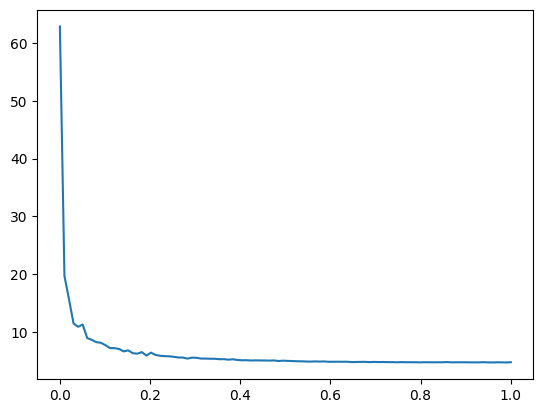

In [6]:
import matplotlib.pyplot as plt

# Now we plot but zoom in:
plt.plot(ranges, avg_path_lengths)
plt.show()

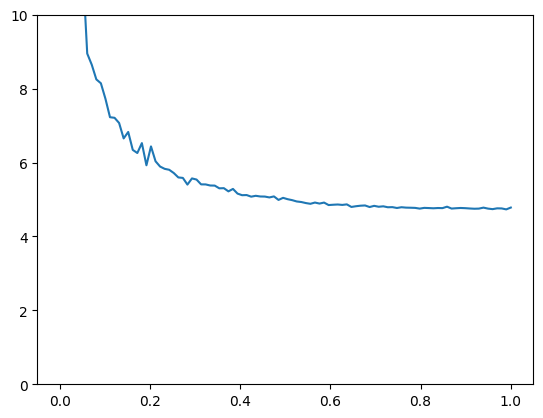

In [7]:
# Now we plot but zoom in:
plt.plot(ranges, avg_path_lengths)
plt.ylim(0,10)
plt.show()

So if we zoom at the graph, we can see that the graph gets flat around $p= 0.6$.

> **Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).**

In [8]:
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

avg_path_lengths = []
std_dev_path_lengths = []

for p in p_values:
    path_lengths = []
    for _ in range(50):
        G = nx.watts_strogatz_graph(500, 4, p)
        avg_path_length = nx.average_shortest_path_length(G)
        path_lengths.append(avg_path_length)
        
    avg_path_lengths.append(np.mean(path_lengths))
    std_dev_path_lengths.append(np.std(path_lengths))

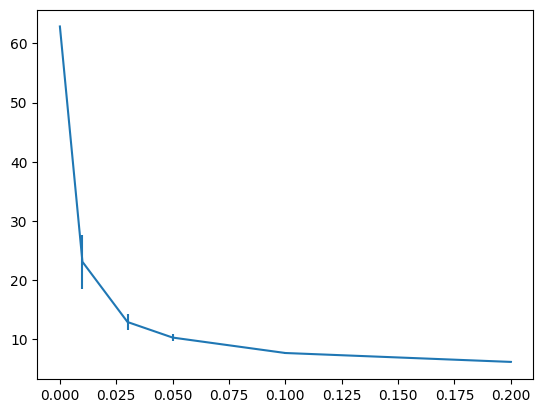

In [9]:
# Now we make a plot with error bars:
plt.errorbar(p_values, avg_path_lengths, yerr=std_dev_path_lengths)
plt.show()

> **Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.**

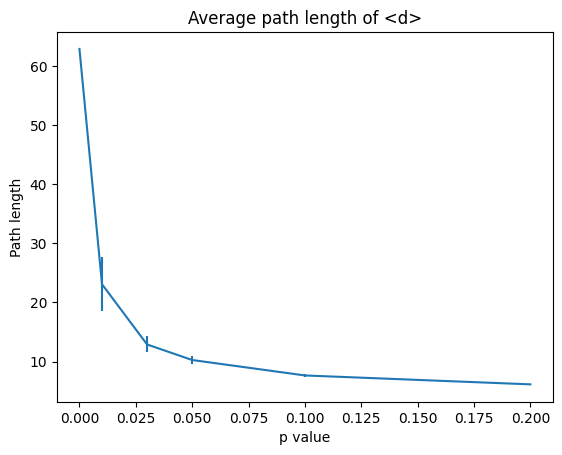

In [10]:
# Now we make a plot with error bars with a caption:
plt.errorbar(p_values, avg_path_lengths, yerr=std_dev_path_lengths)
plt.title("Average path length of <d>")
plt.xlabel("p value")
plt.ylabel("Path length")
plt.show()

## Part 2: Scale-free networks

The text book uses two whole chapters on the scale free property. We'll try and power through during the remainder of this lecture. As always, let's start by getting my take on the whole thing.

> **_Video Lecture_**: The scale free property and the Barabasi-Albert Model. 
> 

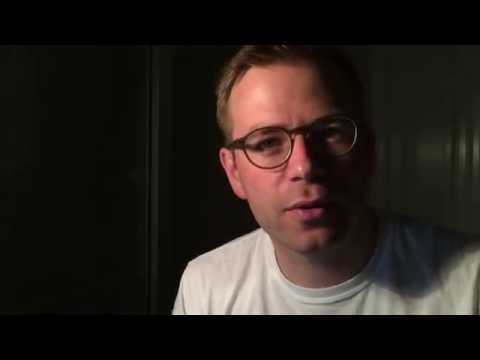

In [11]:
YouTubeVideo("myLgzbXxhOQ",width=800, height=450)

And now it's time for you guys to read. Recall that Barabasi (who wrote the textbook) discovered power-laws.

> *Reading*: Now we dig into the extended history and and theory behind Scale-Free networks and the Barabasi-Albert Model.
> 
> * Chapter 4, Section 4.1 - 4.7\.
> * Chapter 5, section 5.1 - 5.5\.
> 

> *Exercises*: BA edition.
> 
> First a couple of questions to make sure that you've actually read the text.
> 
> * What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).
> * What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.
> 
> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success:
> 
> * First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
> * Now add another node, connecting one of the existing nodes in proportion to their degree.
> * Keep going until you have a 100 node network.
>   * *Hint*: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to it's degree.
> * Plot the network. 
> * Add more nodes until you have a 5000 node network.
> * What's the maximum and minimum degree?
> * Now, bin the degree distribution using `numpy.histogram`.
> * Plot the distribution. Plot it with both linear and log-log axes.
> 
> ![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ba.png)

<div class="alert alert-block alert-info">
As above, I recommend you try this on your own. It's so cool to experience that you can actually code up a BA network on your own ... and that it's not that difficult. See if you can figure out how to do the plotting and get the bins right (*remember last week's exercise*), and as always, it's OK to ask your LLM for help with the styling. 
</div>

> **Answer**

> **What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).**

**Anomalous Regime $(γ \leq 2)$**\
For $γ ‹ 2$ the exponent $1/(γ− 1)$ in (4.18) is larger than one, hence the number of links connected to the largest hub grows faster than the size of the network. This means that for sufficiently large N the degree of the largest hub must exceed the total number of nodes in the network, hence it will run out of nodes to connect to. Similarly, for $γ ‹ 2$ the average degree $〈k〉$ diverges in the $N \rarr \infty$ limit. These odd predictions are only two of the many anomalous features of scale-free networks in this regime. They are signatures of a deeper problem: Large scale-free network with $γ ‹ 2$, that lack multi-links, cannot exist (BOX 4.6).

**Scale-Free Regime $(2 < γ < 3)$**\
In this regime the first moment of the degree distribution is finite but the second and higher moments diverge as $N \rarr \infty$. Consequently scalefree networks in this regime are ultra-small (SECTION 4.6). Equation (4.18) predicts that kmax grows with the size of the network with exponent $1/(γ - 1)$, which is smaller than one. Hence the market share of the largest hub, $k_{max}/N$, representing the fraction of nodes that connect to it, decreases as $k_{max}/N ~ N-(γ-2)/(γ-1)$.

**Random Network Regime $(γ › 3)$**\
According to (4.20) for $γ > 3$ both the first and the second moments are finite. For all practical purposes the properties of a scale-free network in this regime are difficult to distinguish from the properties a random network of similar size. 

Note that scale-free networks with large $γ$ are hard to distinguish from a random network. Indeed, to document the presence of a power-law degree distribution we ideally need 2-3 orders of magnitude of scaling, which means that kmax should be at least $102 - 103$ times larger than kmin. By inverting (4.18) we can estimate the network size necessary to observe the desired scaling regime, finding
$$
N=\left(\frac{k_{max}}{k_{}}\right)^{γ−1} \qquad(4.23)
$$

> ***What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.**

**Nonlinear Preferential Attachment**\
The scaling regimes characterizing the nonlinear Barabási-Albert model. The three top panels show $p_k$ for different $α \, (N=104)$. The network maps show the corresponding topologies $(N=100)$. The theoretical results predict the existence of four scaling regimes:

**No Preferential Attachment $(α=0)$**\
The network has a simple exponential degree distribution, following (5.18). Hubs are absent and the resulting network is similar to a random network.

**Sublinear Regime $(0 < α < 1)$**\
The degree distribution follows the stretched exponential (5.23), resulting in fewer and smaller hubs than in a scale-free network. As $α \rarr 1$ the cutoff length increases and pk follows a power law over an increasing range of degrees.

**Linear Regime $(α=1)$**\
This corresponds to the Barabási-Albert model, hence the degree distribution follows a power law.

**Superlinear Regime $(α > 1)$**\
The high-degree nodes are disproportionately attractive. A winner-takes-all dynamics leads to a hub-and-spoke topology. In this configuration the earliest nodes become super hubs and all subsequent nodes link to them. The degree distribution, shown for $α=1.5$ indicates the coexistence of many small nodes with a few super hubs in the vicinity of $k=104$.



> **First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).**

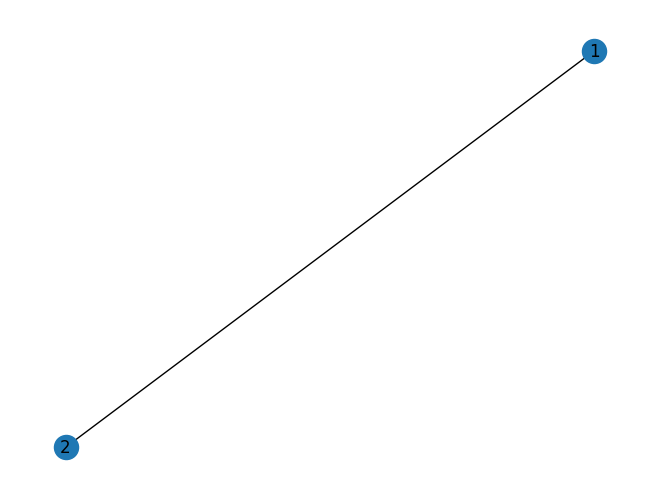

In [28]:
G = nx.Graph()
G.add_node(1)
G.add_edge(1, 2)

nx.draw(G, with_labels=True)
plt.show()

> **Now add another node, connecting one of the existing nodes in proportion to their degree.**

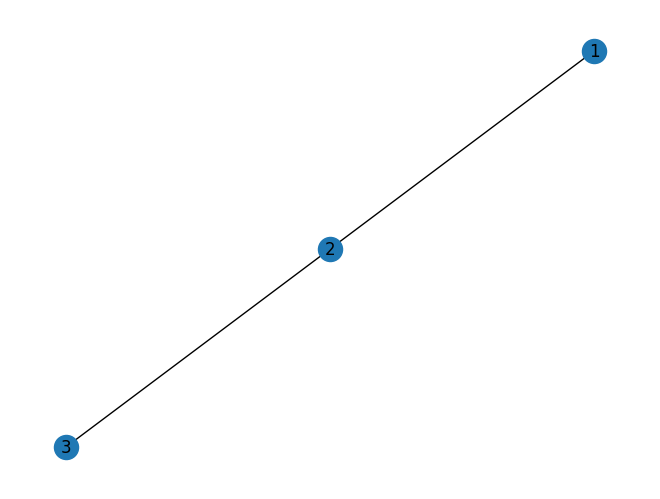

In [29]:
G = nx.Graph()
G.add_node(1)
G.add_edge(1, 2)

G.add_node(2)
G.add_edge(2, 3)

nx.draw(G, with_labels=True)
plt.show()

> **Keep going until you have a 100 node network.**
>   * *Hint*: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to it's degree.

In [31]:
import random

list_of_all_edges = list(G.edges())

flattened_edges = [node for edge in list_of_all_edges for node in edge]

print("list_of_all_edges:",list_of_all_edges)
print("flattened_edges:", flattened_edges)
print("test:", random.choice(flattened_edges))

list_of_all_edges: [(1, 2), (2, 3)]
flattened_edges: [1, 2, 2, 3]
test: 1


In [32]:
for new_node in range(4, 101): # I am starting from 4, because I already have 3 nodes.
    list_of_all_edges = list(G.edges())
    flattened_edges = [node for edge in list_of_all_edges for node in edge]
    chosen_node = random.choice(flattened_edges)
    G.add_node(new_node)
    G.add_edge(new_node, chosen_node)

> **Plot the network.** 

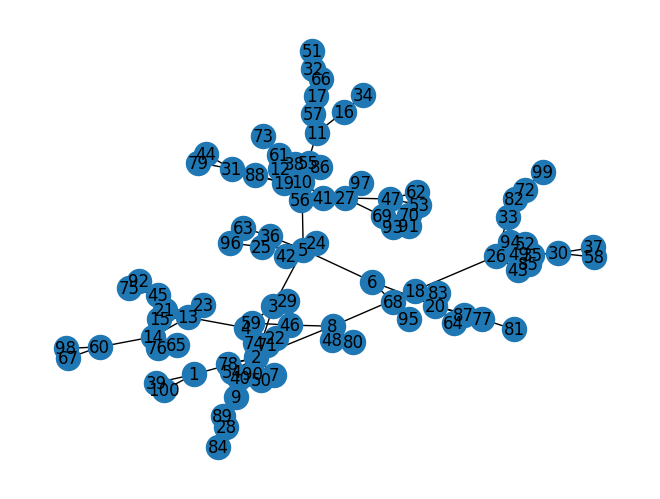

In [33]:
nx.draw(G, with_labels=True)
plt.show()

> **Add more nodes until you have a 5000 node network.**

In [35]:
for new_node in range(100, 5000): # I am starting from 4, because I already have 3 nodes.
    list_of_all_edges = list(G.edges())
    flattened_edges = [node for edge in list_of_all_edges for node in edge]
    chosen_node = random.choice(flattened_edges)
    G.add_node(new_node)
    G.add_edge(new_node, chosen_node)

> **What's the maximum and minimum degree?**

In [37]:
degrees = [degree for node, degree in G.degree()]
min(degrees), max(degrees)

(1, 148)

> **Now, bin the degree distribution using `numpy.histogram`.**

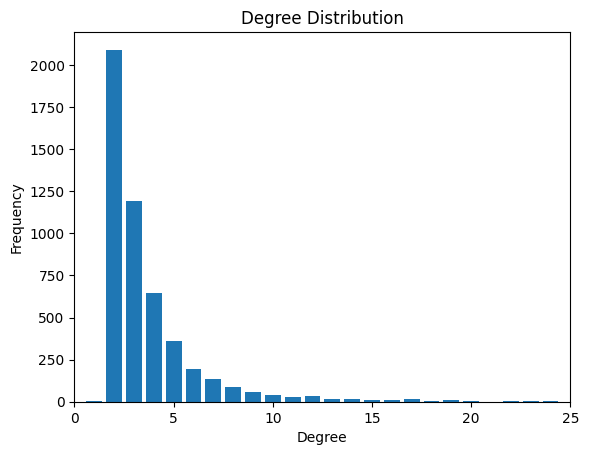

In [51]:
hist, bins = np.histogram(degrees, bins=range(1, max(degrees)+2))
plt.bar(bins[:-1], hist)
plt.xlabel('Degree')
plt.xlim(0,25)
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

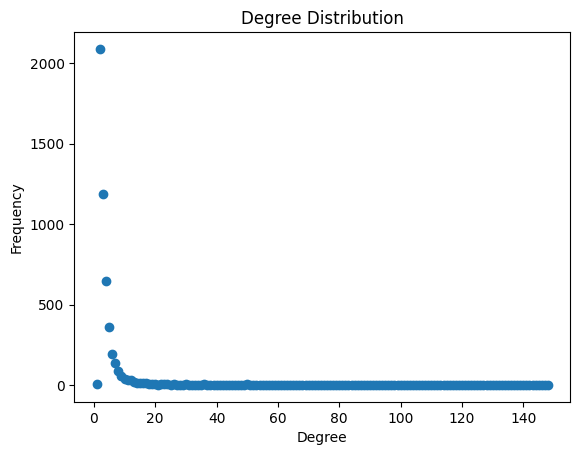

In [57]:
hist, bins = np.histogram(degrees, bins=range(1, max(degrees)+2))
plt.plot(bins[:-1], hist, marker='o', linestyle='None')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

> **Plot the distribution. Plot it with both linear and log-log axes.**

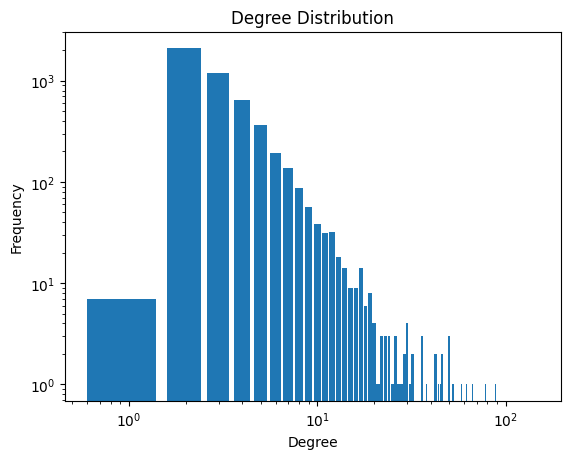

In [59]:
hist, bins = np.histogram(degrees, bins=range(1, max(degrees)+2))
plt.bar(bins[:-1], hist)
plt.xlabel('Degree')
plt.xscale('log') # log log axes
plt.ylabel('Frequency')
plt.yscale('log') # log log axes
plt.title('Degree Distribution')
plt.show()

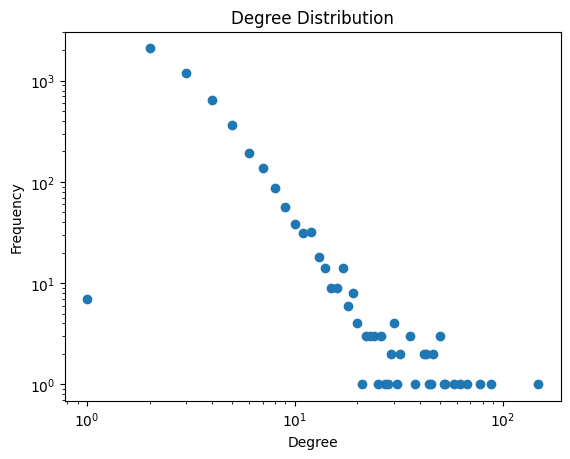

In [58]:
hist, bins = np.histogram(degrees, bins=range(1, max(degrees)+2))
plt.plot(bins[:-1], hist, marker='o', linestyle='None')
plt.xlabel('Degree')
plt.xscale('log') # log log axes
plt.ylabel('Frequency')
plt.yscale('log') # log log axes
plt.title('Degree Distribution')
plt.show()

# Part 3: The friendship paradox in scale-free networks

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ has fewer friends than their friends have, on average\*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated (let's call this network **F-BA** for *friendship BA*). Do the following:

*Exercise*. The friendship paradox in BA networks

> * Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).
> * Find $i$'s [neighbors](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html). And calculate their average degree.
> * Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.
> * Do this 1000 times. How many out of those 1000 times is the friendship paradox true in **F-BA**?

*Exercise*. The friendship paradox more generally
> * What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 2$? Will the fraction of times the paradox is true be higher or lower? 
>  - First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?
>  - Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the [configuation model](https://en.wikipedia.org/wiki/Configuration_model). The `networkx` funtion is here [`nx.configuration_model`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html). I suggest you make the network pretty big ... let's say 5000 nodes or more.
>     * Hint 0: In the `networkx` function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number $r$ uniformly distributed in the range $0 \leq r < 1$, then $x = x_{\textrm{min}}(1 – r)^{-1/\alpha - 1}$ is a random power-law-distributed real number in the range $x_{\textrm{min}} \leq x < \infty$ with exponent $\alpha$. Note that there has to be a lower limit $x_\textrm{min}$ on the range; the power-law distribution diverges as $x\rightarrow 0$. See section 2 [this paper](https://www.cs.cornell.edu/courses/cs6241/2019sp/readings/Newman-2005-distributions.pdf) for more details (especially the $\ddagger$ footnote).
>     * Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.
>     * Hint 2: Also, due to some details of how the configuation works (see the [wiki page](https://en.wikipedia.org/wiki/Configuration_model) for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.
> - Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

<div class="alert alert-block alert-info">
If you want to maximize your learning, think through the questions and code up the exercise above on your own. Again, it's empowering to realize that you can actually do it. I encourage you, however, to ask your LLM to explain the configuration model to you (might be more fun that reading the Wiki page).
</div>

*Exercise*. The friendship paradox and the configuration model
> - Now generate a network for the configuration model that has *the same slope and number of nodes as **F-BA** in A above*; let's call this new network **F-CM** (for *friendship configuration model*). 
>    - What fraction of the time is the friendship paradox is true for the **F-CM** network?
>    - Assuming that **F-BA** and **F-CM** have the same degree sequence can now *think* about if **F-BA** and **F-CM** are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
>       * Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).
>       * How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)


<div class="alert alert-block alert-info">
This second part of the exercise is asking you to think about differences between two models for random networks. For this one, an appealing option could be to use an LLM to help quickly create the networks two and then analyze them using networkx. That way you can check your thinking.   
</div>
<div class="alert alert-block alert-info">
Don't use an LLM for the two last questions "Are there factors ..." and "How would you test ..." Use your brain, do some research and write down your own answer before consulting an LLM.
</div>


> **Answer** *Exercise*. The friendship paradox in BA networks

> **Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).**

In [88]:
F_BA = G

the_chosen_one = random.choice(list(F_BA.nodes()))
the_chosen_one

3233

Find its degree

In [78]:
F_BA.degree(the_chosen_one)

2

> **Find $i$'s [neighbors](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html). And calculate their average degree.**

In [79]:
neighbors = [n for n in F_BA.neighbors(the_chosen_one)]
neighbors

[4031, 2460]

In [86]:
neighbors_degrees = [F_BA.degree(n) for n in neighbors]
neighbors_degrees

[5, 3]

Find their averages degree

In [87]:
np.mean(neighbors_degrees)

np.float64(4.0)

> **Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.**


In friendshop paradaox states that _almost everyone_ has fewer friends than their friends have, on average. 

We found out that the chosen_one have 2 friend. The we looked into that and find out that the average from that friend is 4. 

So this means that we have proved that this is correct. 


> **Do this 1000 times. How many out of those 1000 times is the friendship paradox true in **F-BA**?**

In [89]:
trials = 1000
count_friendship_paradox_true = 0

for _ in range(trials):
    random_node = random.choice(list(G.nodes()))
    node_degree = G.degree[random_node]

    neighbor_degrees = [G.degree[n] for n in G.neighbors(random_node)]
    avg_neighbor_degree = np.mean(neighbor_degrees) if neighbor_degrees else 0
    
    if avg_neighbor_degree > node_degree:
        count_friendship_paradox_true += 1

In [91]:
# Now we check:
count_friendship_paradox_true / trials

0.878

So 88% of the time, the friendship paradox is true

> **Answer** *Exercise*. The friendship paradox more generally

> **What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 2$? Will the fraction of times the paradox is true be higher or lower?**

>  **First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?**

>  **Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the [configuation model](https://en.wikipedia.org/wiki/Configuration_model). The `networkx` funtion is here [`nx.configuration_model`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html). I suggest you make the network pretty big ... let's say 5000 nodes or more.**
> * Hint 0: In the `networkx` function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number $r$ uniformly distributed in the range $0 \leq r < 1$, then $x = x_{\textrm{min}}(1 – r)^{-1/\alpha - 1}$ is a random power-law-distributed real number in the range $x_{\textrm{min}} \leq x < \infty$ with exponent $\alpha$. Note that there has to be a lower limit $x_\textrm{min}$ on the range; the power-law distribution diverges as $x\rightarrow 0$. See section 2 [this paper](https://www.cs.cornell.edu/courses/cs6241/2019sp/readings/Newman-2005-distributions.pdf) for more details (especially the $\ddagger$ footnote).
> * Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.
> * Hint 2: Also, due to some details of how the configuation works (see the [wiki page](https://en.wikipedia.org/wiki/Configuration_model) for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.

> **Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?**

> **Answer** *Exercise*. The friendship paradox and the configuration model

> **Now generate a network for the configuration model that has *the same slope and number of nodes as **F-BA** in A above*; let's call this new network **F-CM** (for *friendship configuration model*).**


>  **What fraction of the time is the friendship paradox is true for the **F-CM** network?**


>  **Assuming that **F-BA** and **F-CM** have the same degree sequence can now *think* about if **F-BA** and **F-CM** are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics**


>  **Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).**


>  **How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)**

*Exercise*: Growth without preferential attachment

> Finally, we'll build a network of same size and degree as in the exercise above, *using the growth mechanism without the preferential attachment*. Follow the steps below for success
> 
>  1. Grow a new network (the Sune-network) with the same parameters as the **F-BA** network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: *have the incoming nodes connect to the existing nodes with* **equal probability**. This is the Sune-network.
>  2. Generate an ER network of same number of nodes and links as the Sune-network. 
> * What are the differences between the ER network and the Sune-network? Explain in your own words. 
>   * *Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.

<div class="alert alert-block alert-info">
Feel free to go nuts in asking an LLM to help you for this last exercise.
</div>

> **Answer** 

> **1. Grow a new network (the Sune-network) with the same parameters as the **F-BA** network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: *have the incoming nodes connect to the existing nodes with* **equal probability**. This is the Sune-network.**

>  **2. Generate an ER network of same number of nodes and links as the Sune-network.**

> **What are the differences between the ER network and the Sune-network? Explain in your own words.**
>   * *Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.